In [5]:
import math
import matplotlib.pyplot as plt

In [115]:
class Robot:
    
    l1 = 0.75
    l2 = 0.85
    l3 = 0.3

    #Question 1/2
    def forwardKinematics(self, theta_1, theta_2, theta_3):
        
        t1 = math.radians(theta_1)
        t2 = math.radians(theta_2)
        t3 = math.radians(theta_3)
        
        #didn't simplifiy the T matrix till later, 
        #didn't want to adjust code when it was already working.
        r11 = math.cos(t1)*( math.cos(t2)*math.cos(t3) - math.sin(t2)*math.sin(t3) ) - math.sin(t1)*( math.sin(t2)*math.cos(t3) + math.cos(t2)*math.sin(t3) )
        r21 = math.sin(t1)*( math.cos(t2)*math.cos(t3) - math.sin(t2)*math.sin(t3) ) + math.cos(t1)*( math.sin(t2)*math.cos(t3) + math.cos(t2)*math.sin(t3) )
        r31 = 0.00
        r12 = -math.cos(t1)*( math.cos(t2)*math.sin(t3) + math.sin(t2)*math.cos(t3) ) + math.sin(t1)*( math.sin(t2)*math.sin(t3) - math.cos(t2)*math.cos(t3) )
        r22 = -math.sin(t1)*( math.cos(t2)*math.sin(t3) + math.sin(t2)*math.cos(t3) ) - math.cos(t1)*( math.sin(t2)*math.sin(t3) - math.cos(t2)*math.cos(t3) )
        r32 = 0.00
        r13 = 0.00
        r23 = 0.00
        r33 = 1.00
        px = self.l3*math.cos(t1)*( math.cos(t2)*math.cos(t3) - math.sin(t2)*math.sin(t3) ) - self.l3*math.sin(t1)*( math.sin(t2)*math.cos(t3) + math.cos(t2)*math.sin(t3) ) + self.l2*( math.cos(t1)*math.cos(t2) - math.sin(t1)*math.sin(t2) ) + self.l1*math.cos(t1)
        py = self.l3*math.sin(t1)*( math.cos(t2)*math.cos(t3) - math.sin(t2)*math.sin(t3) ) + self.l3*math.cos(t1)*( math.sin(t2)*math.cos(t3) + math.cos(t2)*math.sin(t3) ) + self.l2*( math.sin(t1)*math.cos(t2) + math.cos(t1)*math.sin(t2) ) + self.l1*math.sin(t1)
        pz = 0.00
        
        return (px, py)
        
    #Question 5/6
    def inverseKinematics(self, x, y):
        
        t1v1 = math.degrees(math.atan2(y-0.3, x) - math.acos((x**2 + (y - 0.3)**2 - 0.16) / (1.5*math.sqrt(x**2 + (y - 0.3)**2))))
        t1v2 = math.degrees(math.atan2(y-0.3, x) + math.acos((x**2 + (y - 0.3)**2 - 0.16) / (1.5*math.sqrt(x**2 + (y - 0.3)**2))))
        
        t2v1 = math.degrees(math.acos(40/51*(x**2 + (y-0.3)**2 -(257/200))))
        t2v2 = math.degrees(-math.acos(40/51*(x**2 + (y-0.3)**2 -(257/200))))
        
        t3v1 = 90 - t1v1 - t2v1
        t3v2 = 90 - t1v2 - t2v2
        
        return (t1v1, t2v1, t3v1)

        
    #Question 7/8
    def constantJointVelocities(self, p1_angle1, p1_angle2, p1_angle3, p2_angle1, p2_angle2, p2_angle3, time_dif):
        
        angle1_vel = (p1_angle1 - p2_angle1)/time_dif
        angle2_vel = (p1_angle2 - p2_angle2)/time_dif
        angle3_vel = (p1_angle3 - p2_angle3)/time_dif
        
        time = 0
        
        xlist = []
        ylist = []
        
        #when adding 0.05 to time, it added 0.05 and 1*10^-5 weirdly, 
        #resulting in it missing the final point when using <=, hense the 0.001
        while(time < time_dif+0.001):
            
            angle1 = p1_angle1 - angle1_vel*time
            angle2 = p1_angle2 - angle2_vel*time
            angle3 = p1_angle3 - angle3_vel*time
            
            (x, y) = self.forwardKinematics(angle1, angle2, angle3)
            xlist.append(x)
            ylist.append(y)
            
            time = time + 0.05
        
        return (xlist, ylist)
        
    #Question 8  
    def cjvMultiWaypoint(self, wayPointList, overallTime):
        
        #("Hi")
        xlist = []
        ylist = []
        size = len(wayPointList)
        
        #1 less time period then actual points
        time = overallTime/(size - 1)
        i = 0
        
        #Note size is one more than final index, and we don't want it to iterate over the 
        #final index as there is no 2nd point for it.
        while (i < size - 1):
            (x1, y1) = wayPointList[i]
            (x2, y2) = wayPointList[i+1]
            (p1a1, p1a2, p1a3) = self.inverseKinematics(x1, y1)
            (p2a1, p2a2, p2a3) = self.inverseKinematics(x2, y2)
            
            (x, y) = self.constantJointVelocities(p1a1, p1a2, p1a3, p2a1, p2a2, p2a3, time)
            xlist = xlist + x
            ylist = ylist + y
            i = i+1
            
        return(xlist, ylist)
    
    #Question 9
    def inverseJacobians(self, x_velocity, y_velocity, t1_degrees, t2_degrees):
        
        t1 = math.radians(t1_degrees)
        t2 = math.radians(t2_degrees)
        
        t1_velocity = ( x_velocity*math.cos(t1 + t2) + y_velocity*math.sin(t1 + t2) ) / (self.l1*math.sin(t2))
        t2_velocity = -(( x_velocity*(self.l1*math.cos(t1) + self.l2*math.cos(t1+t2)) + y_velocity*(self.l1*math.sin(t1) + self.l2*math.sin(t1 + t2)) ) / (self.l1*self.l2*math.sin(t2)))
        t3_velocity = ( x_velocity*math.cos(t1) + y_velocity*math.sin(t1) ) / (self.l2*math.sin(t2))
        
        return (t1_velocity, t2_velocity, t3_velocity)
    
    
    #Question 9
    def constructPolynomial(self, a0, af, av0, avf, time):
        
        
        c0 = a0
        c1 = av0
        c2 = (3*(af - a0) / (time**2)) - ( (avf + 2*av0) / time)
        c3 = -(2*(af - a0) / (time**3)) + ( (avf + av0) / time**2 )
        
        return c0, c1, c2, c3
    
    #Question 9
    def constructJacobianTrajectory(self, x1, y1, xv1, yv1, x2, y2, xv2, yv2, total_time, timestep):
        
        if(timestep <= 0):
            timestep = 0.05
        
        (p1_a1, p1_a2, p1_a3) = self.inverseKinematics(x1, y1)
        (p2_a1, p2_a2, p2_a3) = self.inverseKinematics(x2, y2)
        
        (p1_a1_v, p1_a2_v, p1_a3_v) = self.inverseJacobians(xv1, yv1, p1_a1, p1_a2)
        (p2_a1_v, p2_a2_v, p2_a3_v) = self.inverseJacobians(xv2, yv2, p2_a1, p2_a2)
        
        (a1c0, a1c1, a1c2, a1c3) = self.constructPolynomial(p1_a1, p2_a1, p1_a1_v, p2_a1_v, total_time)
        (a2c0, a2c1, a2c2, a2c3) = self.constructPolynomial(p1_a2, p2_a2, p1_a2_v, p2_a2_v, total_time)
        (a3c0, a3c1, a3c2, a3c3) = self.constructPolynomial(p1_a3, p2_a3, p1_a3_v, p2_a3_v, total_time)
        
        
        xlist = []
        ylist = []
        
        time = 0
        
        while(time < total_time + 0.0001):
            
            angle1 = a1c0 + a1c1*time + a1c2*time**2 + a1c3*time**3
            angle2 = a2c0 + a2c1*time + a2c2*time**2 + a2c3*time**3
            angle3 = a3c0 + a3c1*time + a3c2*time**2 + a3c3*time**3
            
            (x, y) = self.forwardKinematics(angle1, angle2, angle3)
            
            xlist.append(x)
            ylist.append(y)
            
            time = time + timestep
            
                        
        return (xlist, ylist)
            
    
    #Question 9
    def jMultiWaypoint(self, wayPointList, overallTime, timestep):
        
        xlist = []
        ylist = []
        size = len(wayPointList)
        
        time = overallTime/(size - 1)
        i = 0
        
        #Note size is one more than final index, And we don't want it to 
        #iterate over final index as there is no 2nd point for it.
        while (i < size - 1):
            (x1, y1, x1v, y1v) = wayPointList[i]
            (x2, y2, x2v, y2v) = wayPointList[i+1]
            
            (x, y) = self.constructJacobianTrajectory(x1, y1, x1v, y1v, x2, y2, x2v, y2v, time, timestep)
            xlist = xlist + x
            ylist = ylist + y
            i = i+1
            
        return (xlist, ylist)
     
        
    #Question 10
    def deviationLimit(self, x1, y1, x2, y2, overallTime, deviationLimit, timestep):
        
        deviation = deviationLimit + 1
        xlist = []
        ylist = []
        list = []
        i = 1
        
        while(deviation > deviationLimit or i < 10):
            dx = (x2 - x1)/i
            dy = (y2 - y1)/i
            n = 0
            list = []
            while(n < i+1):
                x = x1 + dx*n
                y = y1 + dy*n
                list.append((x,y,1,0))
                n = n + 1
                
            (xlist, ylist) = self.jMultiWaypoint(list, overallTime, timestep)
            ydev = 0
            for yd in ylist:
                if((yd - 1) > ydev):
                    ydev = (yd -1)
            
            deviation = ydev
            i = i + 1
        
        return (list, xlist, ylist)
    
    #To display the graphs  
    def graph(self, xlist, ylist):
        plt.plot(xlist, ylist)
        plt.xlabel("x/m")
        plt.ylabel("y/m")
        plt.title("Trajectory")
        plt.show()
            

In [116]:
r1 = Robot()

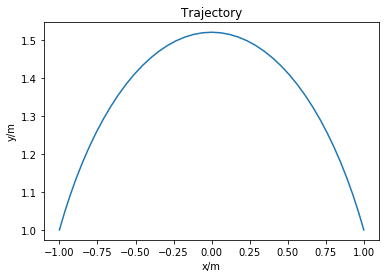

In [120]:
(p1t1, p1t2, p1t3) = r1.inverseKinematics(-1,1)
(p2t1, p2t2, p2t3) = r1.inverseKinematics(1,1)

(x,y) = r1.constantJointVelocities(p1t1,p1t2,p1t3,p2t1,p2t2,p2t3,2)
r1.graph(x,y)

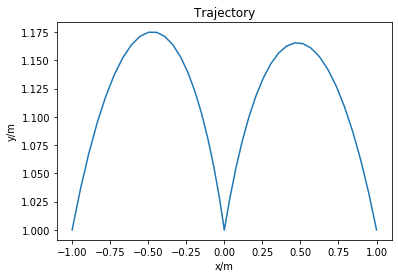

In [121]:
list = [(-1,1),(0,1),(1,1)]
(x,y) = r1.cjvMultiWaypoint(list, 2)
r1.graph(x,y)

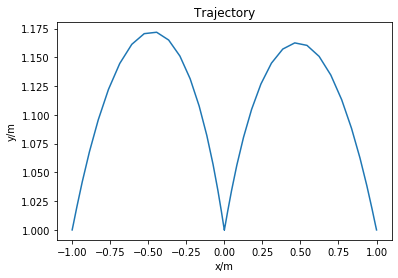

In [96]:
list = [(-1, 1, 1, 0), (0, 1, 1, 0), (1, 1, 1, 0)]
(x,y) = r1.jMultiWaypoint(list, 2)
r1.graph(x, y)

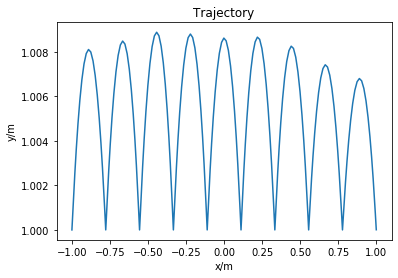

List of Waypoints (x, y, xv, yv):  [(-1.0, 1.0, 1, 0), (-0.7777777777777778, 1.0, 1, 0), (-0.5555555555555556, 1.0, 1, 0), (-0.33333333333333337, 1.0, 1, 0), (-0.11111111111111116, 1.0, 1, 0), (0.11111111111111116, 1.0, 1, 0), (0.33333333333333326, 1.0, 1, 0), (0.5555555555555554, 1.0, 1, 0), (0.7777777777777777, 1.0, 1, 0), (1.0, 1.0, 1, 0)]  Number of WayPoints: 10


In [118]:
(list, x, y) = r1.deviationLimit(-1,1,1,1,2,1,0.01)
r1.graph(x,y)
print("List of Waypoints (x, y, xv, yv): ", list, " Number of WayPoints:", len(list))